In [1]:
import pandas as pd
import numpy as np
from collections import Counter as c
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,mean_squared_error,mean_absolute_error
import pickle
from sklearn.linear_model import LinearRegression

In [3]:
data=pd.read_csv("CO2 Emissions_Canada.csv")

In [35]:
data.columns=['Make','Model.1','Vehicle_class','Engine_Size','Cylinders','Transmission','Fuel_Type','Fuel_Consumption_City','Fuel_Consumption_Hwy','Fuel_Consumption_Comb(L/100 km)','Fuel_Consumption_Comb(mpg)','CO2_Emissions']

In [5]:
data.columns

Index(['Make', 'Model.1', 'Vehicle_class', 'Engine_Size', 'Cylinders',
       'Transmission', 'Fuel_Type', 'Fuel_Consumption_City',
       'Fuel_Consumption_Hwy', 'Fuel_Consumption_Comb(L/100 km)',
       'Fuel_Consumption_Comb(mpg)', 'CO2_Emissions'],
      dtype='object')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Make                             7385 non-null   object 
 1   Model.1                          7385 non-null   object 
 2   Vehicle_class                    7385 non-null   object 
 3   Engine_Size                      7385 non-null   float64
 4   Cylinders                        7385 non-null   int64  
 5   Transmission                     7385 non-null   object 
 6   Fuel_Type                        7385 non-null   object 
 7   Fuel_Consumption_City            7385 non-null   float64
 8   Fuel_Consumption_Hwy             7385 non-null   float64
 9   Fuel_Consumption_Comb(L/100 km)  7385 non-null   float64
 10  Fuel_Consumption_Comb(mpg)       7385 non-null   int64  
 11  CO2_Emissions                    7385 non-null   int64  
dtypes: float64(4), int64

In [7]:
data.describe()

,Engine_Size,Cylinders,Fuel_Consumption_City,Fuel_Consumption_Hwy,Fuel_Consumption_Comb(L/100 km),Fuel_Consumption_Comb(mpg),CO2_Emissions
count,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000
mean,3.160068,5.615030,12.556534,9.041706,10.975071,27.481652,250.584699
std,1.354170,1.828307,3.500274,2.224456,2.892506,7.231879,58.512679
min,0.900000,3.000000,4.200000,4.000000,4.100000,11.000000,96.000000
25%,2.000000,4.000000,10.100000,7.500000,8.900000,22.000000,208.000000
50%,3.000000,6.000000,12.100000,8.700000,10.600000,27.000000,246.000000
75%,3.700000,6.000000,14.600000,10.200000,12.600000,32.000000,288.000000
max,8.400000,16.000000,30.600000,20.600000,26.100000,69.000000,522.000000


In [8]:
np.unique(data.dtypes,return_counts=True)

(array([dtype('int64'), dtype('float64'), dtype('O')], dtype=object),
 array([3, 4, 5], dtype=int64))

In [9]:
cat=data.dtypes[data.dtypes=='O'].index.values
cat

array(['Make', 'Model.1', 'Vehicle_class', 'Transmission', 'Fuel_Type'],
      dtype=object)

In [10]:
for i in cat:
    print("Column: ",i)
    print("Count Classes: ",data[i].nunique())
    print(c(data[i]))
    print('*'*120)

Column:  Make
Count Classes:  42
Counter({'FORD': 628, 'CHEVROLET': 588, 'BMW': 527, 'MERCEDES-BENZ': 419, 'PORSCHE': 376, 'TOYOTA': 330, 'GMC': 328, 'AUDI': 286, 'NISSAN': 259, 'JEEP': 251, 'DODGE': 246, 'KIA': 231, 'HONDA': 214, 'HYUNDAI': 210, 'MINI': 204, 'VOLKSWAGEN': 197, 'MAZDA': 180, 'LEXUS': 178, 'JAGUAR': 160, 'CADILLAC': 158, 'SUBARU': 140, 'VOLVO': 124, 'INFINITI': 108, 'BUICK': 103, 'RAM': 97, 'LINCOLN': 96, 'MITSUBISHI': 95, 'CHRYSLER': 88, 'LAND ROVER': 85, 'FIAT': 73, 'ACURA': 72, 'MASERATI': 61, 'ROLLS-ROYCE': 50, 'ASTON MARTIN': 47, 'BENTLEY': 46, 'LAMBORGHINI': 41, 'ALFA ROMEO': 30, 'GENESIS': 25, 'SCION': 22, 'SMART': 7, 'BUGATTI': 3, 'SRT': 2})
************************************************************************************************************************
Column:  Model.1
Count Classes:  2053
Counter({'F-150 FFV': 32, 'F-150 FFV 4X4': 32, 'MUSTANG': 27, 'FOCUS FFV': 24, 'SONIC': 20, 'SONIC 5': 20, 'F-150': 20, 'F-150 4X4': 20, 'ATS': 19, 'ACCORD': 19, 'COMP

In [11]:
#combining similar types of classes
data["Transmission"]=np.where(data["Transmission"].isin(["A4","A5","A3"]),"Automatic",data["Transmission"])
data["Transmission"]=np.where(data["Transmission"].isin(["M5","M6"]),"Manual",data["Transmission"])
data["Transmission"]=np.where(data["Transmission"].isin(["AS4","AS5"]),"Automatic with Select Shift",data["Transmission"])
data["Transmission"]=np.where(data["Transmission"].isin(["AV"]),"Continously Variable",data["Transmission"])
c(data['Transmission'])

Counter({'Automatic with Select Shift': 28,
         'Manual': 1094,
         'AV7': 118,
         'AS6': 1324,
         'AM6': 132,
         'A6': 789,
         'AM7': 445,
         'AV8': 39,
         'AS8': 1211,
         'A7': 53,
         'A8': 490,
         'M7': 91,
         'Automatic': 149,
         'Continously Variable': 295,
         'AS7': 319,
         'A9': 339,
         'AS9': 77,
         'AV6': 113,
         'AM5': 4,
         'AM8': 62,
         'AM9': 3,
         'AS10': 168,
         'A10': 31,
         'AV10': 11})

In [12]:
data["Fuel_Type"]=np.where(data["Fuel_Type"]=="Z","Premium Gasoline",data["Fuel_Type"])
data["Fuel_Type"]=np.where(data["Fuel_Type"]=="X","Regular Gasoline",data["Fuel_Type"])
data["Fuel_Type"]=np.where(data["Fuel_Type"]=="D","Diesel",data["Fuel_Type"])
data["Fuel_Type"]=np.where(data["Fuel_Type"]=="E","Ethanol",data["Fuel_Type"])
data["Fuel_Type"]=np.where(data["Fuel_Type"]=="N","Natural Gas",data["Fuel_Type"])
c(data['Fuel_Type'])

Counter({'Premium Gasoline': 3202,
         'Diesel': 175,
         'Regular Gasoline': 3637,
         'Ethanol': 370,
         'Natural Gas': 1})

In [13]:
#For Numerical Columns
data.dtypes[data.dtypes!='O'].index.values

array(['Engine_Size', 'Cylinders', 'Fuel_Consumption_City',
       'Fuel_Consumption_Hwy', 'Fuel_Consumption_Comb(L/100 km)',
       'Fuel_Consumption_Comb(mpg)', 'CO2_Emissions'], dtype=object)

In [14]:
#Null values
data.isnull().sum()

Make                               0
Model.1                            0
Vehicle_class                      0
Engine_Size                        0
Cylinders                          0
Transmission                       0
Fuel_Type                          0
Fuel_Consumption_City              0
Fuel_Consumption_Hwy               0
Fuel_Consumption_Comb(L/100 km)    0
Fuel_Consumption_Comb(mpg)         0
CO2_Emissions                      0
dtype: int64

In [15]:
# Label Encoding
from sklearn.preprocessing import LabelEncoder
x='*'
for i in cat:
    print("Label encoding of: ",i)
    LE=LabelEncoder()
    print(c(data[i]))
    data[i]=LE.fit_transform(data[i])
    print(c(data[i]))
    print(x*100)

Label encoding of:  Make
Counter({'FORD': 628, 'CHEVROLET': 588, 'BMW': 527, 'MERCEDES-BENZ': 419, 'PORSCHE': 376, 'TOYOTA': 330, 'GMC': 328, 'AUDI': 286, 'NISSAN': 259, 'JEEP': 251, 'DODGE': 246, 'KIA': 231, 'HONDA': 214, 'HYUNDAI': 210, 'MINI': 204, 'VOLKSWAGEN': 197, 'MAZDA': 180, 'LEXUS': 178, 'JAGUAR': 160, 'CADILLAC': 158, 'SUBARU': 140, 'VOLVO': 124, 'INFINITI': 108, 'BUICK': 103, 'RAM': 97, 'LINCOLN': 96, 'MITSUBISHI': 95, 'CHRYSLER': 88, 'LAND ROVER': 85, 'FIAT': 73, 'ACURA': 72, 'MASERATI': 61, 'ROLLS-ROYCE': 50, 'ASTON MARTIN': 47, 'BENTLEY': 46, 'LAMBORGHINI': 41, 'ALFA ROMEO': 30, 'GENESIS': 25, 'SCION': 22, 'SMART': 7, 'BUGATTI': 3, 'SRT': 2})
Counter({13: 628, 9: 588, 5: 527, 28: 419, 32: 376, 39: 330, 15: 328, 3: 286, 31: 259, 20: 251, 11: 246, 21: 231, 16: 214, 17: 210, 29: 204, 40: 197, 27: 180, 24: 178, 19: 160, 8: 158, 38: 140, 41: 124, 18: 108, 7: 103, 33: 97, 25: 96, 30: 95, 10: 88, 23: 85, 12: 73, 0: 72, 26: 61, 34: 50, 2: 47, 4: 46, 22: 41, 1: 30, 14: 25, 35: 22

<AxesSubplot:xlabel='Make', ylabel='CO2_Emissions'>

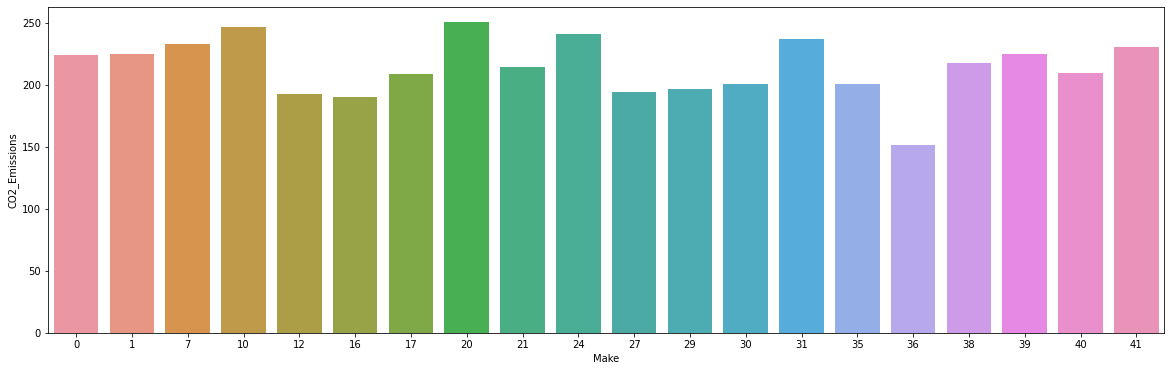

In [31]:
# Data Visualization
m=data.groupby(['Make'])['CO2_Emissions'].mean().sort_values()[:20].reset_index()
plt.figure(figsize=(20,6))
sns.barplot(x="Make",y="CO2_Emissions",data=m)

<AxesSubplot:xlabel='Vehicle_class', ylabel='CO2_Emissions'>

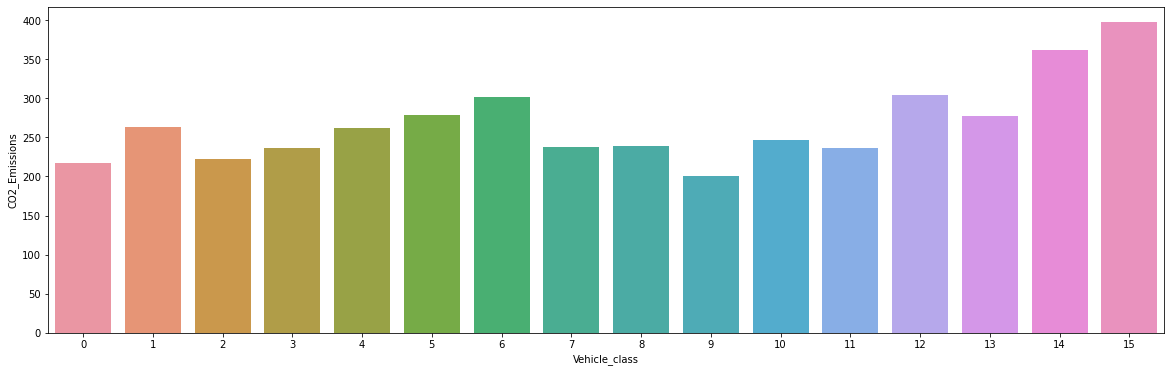

In [33]:
p=data.groupby(['Vehicle_class'])['CO2_Emissions'].mean().sort_values(ascending=False)[:20].reset_index()
plt.figure(figsize=(20,6))
sns.barplot(x="Vehicle_class",y="CO2_Emissions",data=p)

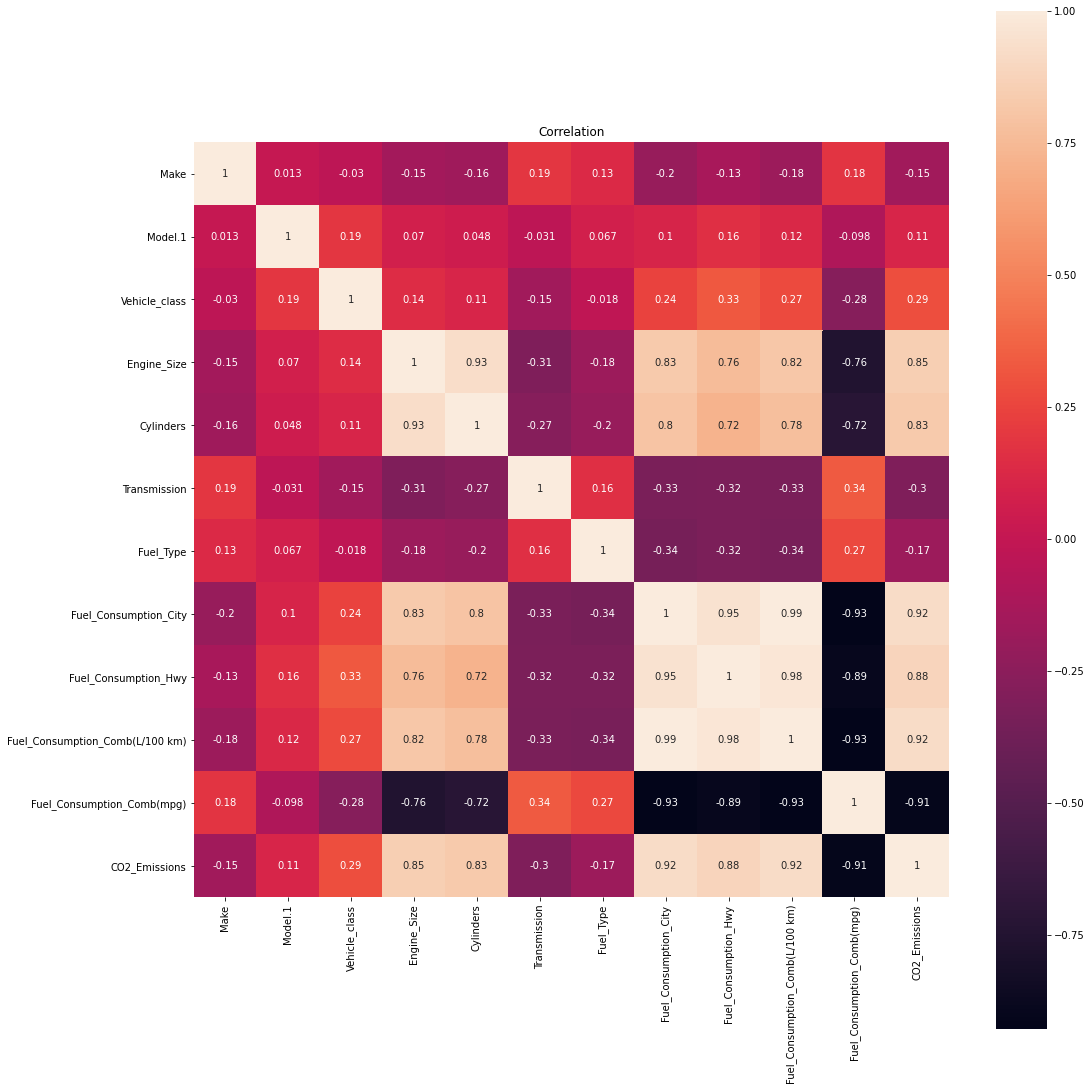

In [34]:
#Correlation
corr=data.corr()
plt.subplots(figsize=(16,16));
sns.heatmap(corr,annot=True, square=True)
plt.title("Correlation")
plt.tight_layout()
plt.show()

In [ ]:
# Splitting the data

In [17]:
x=data.drop(['Model.1','Fuel_Consumption_Comb(L/100 km)','CO2_Emissions'],axis=1)
x

,Make,Vehicle_class,Engine_Size,Cylinders,Transmission,Fuel_Type,Fuel_Consumption_City,Fuel_Consumption_Hwy,Fuel_Consumption_Comb(mpg)
0,0,0,2.0,4,20,3,9.9,6.7,33
1,0,0,2.4,4,23,3,11.2,7.7,29
2,0,0,1.5,4,17,3,6.0,5.8,48
3,0,11,3.5,6,11,3,12.7,9.1,25
4,0,11,3.5,6,11,3,12.1,8.7,27
...,...,...,...,...,...,...,...,...,...
7380,41,11,2.0,4,13,3,10.7,7.7,30
7381,41,11,2.0,4,13,3,11.2,8.3,29
7382,41,11,2.0,4,13,3,11.7,8.6,27
7383,41,12,2.0,4,13,3,11.2,8.3,29


In [18]:
y=data.iloc[:,11:]
y

,CO2_Emissions
0,196
1,221
2,136
3,255
4,244
...,...
7380,219
7381,232
7382,240
7383,232


In [19]:
import joblib
joblib.dump(LE,'columnmain2')

['columnmain2']

In [20]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(5908, 9)
(5908, 1)
(1477, 9)
(1477, 1)


In [21]:
#Model building
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [22]:
# Predicting the values
y_pred=lr.predict(x_test)

In [23]:
y_pred

array([[247.6293238 ],
       [182.00342886],
       [255.70097562],
       ...,
       [240.63599994],
       [143.91161184],
       [233.0077236 ]])

In [24]:
from sklearn.metrics import r2_score
accuracy = r2_score(y_test,y_pred)

In [25]:
accuracy

0.9153030155062258

In [26]:
import pickle 
pickle.dump(lr,open('CO2.pkl','wb'))